In [1]:
import numpy as np
import pandas as pd
import os
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Changing the directory to my local

In [2]:
os.chdir('C:\\Users\\anchhabra\\Analytics_Challenge_05_Topic_Modeling\\Raw_Data')

### Import Train and Test Datasets

In [61]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)
test.head(3)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...  
2    Frame aggregation is a mechanism by which mu...

In [4]:
# train.columns
# train = train.drop(columns=['Computer Science', 'Physics', 'Mathematics',
#        'Statistics', 'Quantitative Biology', 'Quantitative Finance'],axis =1)
# train.head(2)

# Exploratory Data Analysis

In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
ID                      20972 non-null int64
TITLE                   20972 non-null object
ABSTRACT                20972 non-null object
Computer Science        20972 non-null int64
Physics                 20972 non-null int64
Mathematics             20972 non-null int64
Statistics              20972 non-null int64
Quantitative Biology    20972 non-null int64
Quantitative Finance    20972 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
ID          8989 non-null int64
TITLE       8989 non-null object
ABSTRACT    8989 non-null object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


### Missing Values

In [6]:
# Train data
missing_val_train = train.isnull().sum()
missing_val_train_percentage =  missing_val_train/len(train)
missing_data_train = pd.concat([missing_val_train,missing_val_train_percentage],axis=1)
missing_data_train = missing_data_train.rename(columns = {0:'Missing Values',1:'Missing Value Percentage'})
missing_data_train

# Test data
missing_val_test = test.isnull().sum()
missing_val_test_percentage =  missing_val_test/len(test)
missing_data_test = pd.concat([missing_val_test,missing_val_test_percentage],axis=1)
missing_data_test = missing_data_test.rename(columns = {0:'Missing Values',1:'Missing Value Percentage'})
missing_data_test

Missing Values  Missing Value Percentage
ID                                 0                       0.0
TITLE                              0                       0.0
ABSTRACT                           0                       0.0
Computer Science                   0                       0.0
Physics                            0                       0.0
Mathematics                        0                       0.0
Statistics                         0                       0.0
Quantitative Biology               0                       0.0
Quantitative Finance               0                       0.0

Missing Values  Missing Value Percentage
ID                     0                       0.0
TITLE                  0                       0.0
ABSTRACT               0                       0.0

### Calculating number of comments from abstract under each label

In [7]:
rowSums = train.iloc[:,3:].sum(axis=1)
clean_comments_count= (rowSums==0).sum(axis=0)

print(f'Total number of comments = {len(train)}')
print(f'Number of clean comments = {clean_comments_count}')
print(f'Number of comments with labels = {(len(train)-clean_comments_count)}')

Total number of comments = 20972
Number of clean comments = 0
Number of comments with labels = 20972


In [48]:
categories = list(train.columns.values)
categories = categories[3:]
print(categories)

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


In [9]:
# Calculating number of comments in each category
counts = []
for i in categories:
    counts.append((i,train[i].sum()))
# print(counts)

train_stats = pd.DataFrame(counts,columns=['category', 'number of comments'])
train_stats

category  number of comments
0      Computer Science                8594
1               Physics                6013
2           Mathematics                5618
3            Statistics                5206
4  Quantitative Biology                 587
5  Quantitative Finance                 249

### Plotting the label wise comments abstract

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

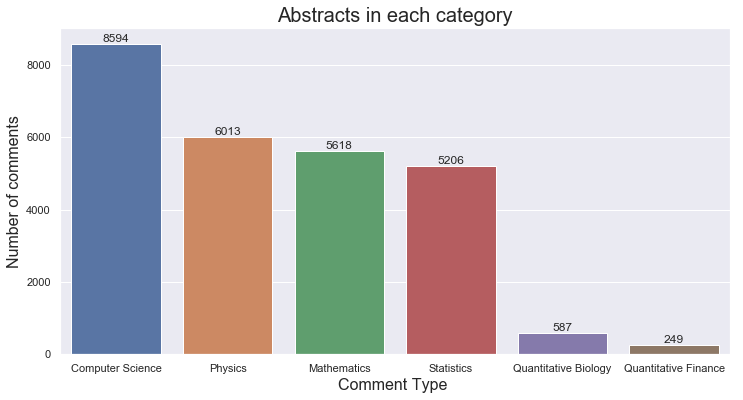

In [20]:
sns.set(font_scale = 1)
plt.figure(figsize=(12,6))

ax = sns.barplot(categories, train.iloc[:,3:].sum().values)

plt.title("Abstracts in each category", fontsize=20)
plt.ylabel('Number of comments', fontsize=16)
plt.xlabel('Comment Type ', fontsize=16)

#adding the text labels
rects = ax.patches
labels = train.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)

plt.show();

### Calculating number of comments having multiple labels

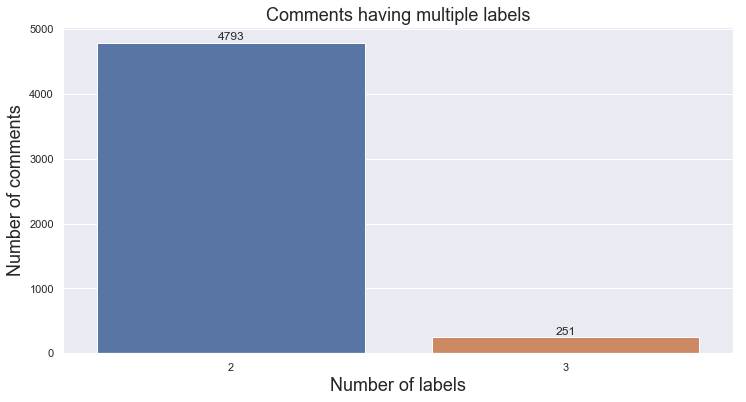

In [21]:
rowSums = train.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(12,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels", fontsize=18)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show();

### WordCloud representation of most used words in each category of comments

In [22]:
train.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [18]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [2]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
# Round 1
all_stopwords = stopwords.words('english')
def remove_stopwords(text):
    words = [w for w in text if w not in all_stopwords]
    return words

# Round - 2
all_stopwords.append("present")
all_stopwords.append("paper")
all_stopwords.append("study")
all_stopwords.append("based")
all_stopwords.append("introduce")
all_stopwords.append("learning")
all_stopwords.append("new")
all_stopwords.append("using")
all_stopwords.append("let")

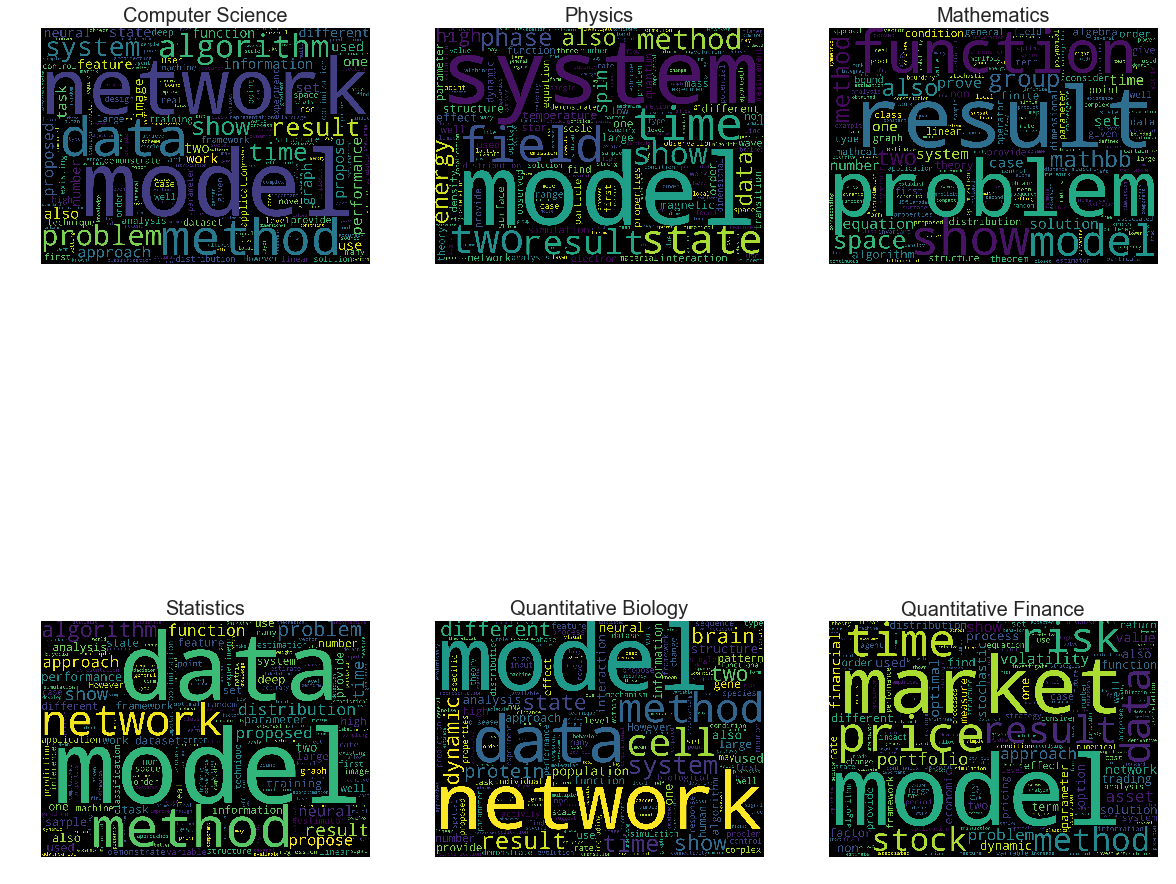

In [36]:
plt.figure(figsize=(20,20))

# Computer Science
subset = train[train['Computer Science']==1]

text = subset.ABSTRACT.values

cloud_computer_science = WordCloud(stopwords= all_stopwords,
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                                  ).generate(" ".join(text))
plt.subplot(2,3,1)
plt.axis('off')
plt.title('Computer Science',fontsize=20)
plt.imshow(cloud_computer_science)

# Physics
subset = train[train['Physics']==1]

text = subset.ABSTRACT.values

cloud_Physics = WordCloud(stopwords= all_stopwords,
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                         ).generate(" ".join(text))

plt.subplot(2,3,2)
plt.axis('off')
plt.title('Physics',fontsize=20)
plt.imshow(cloud_Physics)

# Mathematics
subset = train[train['Mathematics']==1]

text = subset.ABSTRACT.values

cloud_Maths = WordCloud(stopwords= all_stopwords,
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                         ).generate(" ".join(text))

plt.subplot(2,3,3)
plt.axis('off')
plt.title('Mathematics',fontsize=20)
plt.imshow(cloud_Maths)

# Statistics
subset = train[train['Statistics']==1]

text = subset.ABSTRACT.values

cloud_stats = WordCloud(stopwords = all_stopwords,
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,4)
plt.axis('off')
plt.title('Statistics',fontsize=20)
plt.imshow(cloud_stats)

# Quantitative Biology
subset = train[train['Quantitative Biology']==1]

text = subset.ABSTRACT.values

cloud_quant_bio = WordCloud(stopwords = all_stopwords,
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,5)
plt.axis('off')
plt.title('Quantitative Biology',fontsize=20)
plt.imshow(cloud_quant_bio)

# Quantitative Finance
subset = train[train['Quantitative Finance']==1]

text = subset.ABSTRACT.values

cloud_quant_Fin = WordCloud(stopwords = all_stopwords,
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,6)
plt.axis('off')
plt.title('Quantitative Finance',fontsize=20)
plt.imshow(cloud_quant_Fin)

plt.show();

# Text Data Cleaning

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [20]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [21]:
train['ABSTRACT'] =  train['ABSTRACT'].str.lower()
test['ABSTRACT'] =  test['ABSTRACT'].str.lower()

train['ABSTRACT'] =  train['ABSTRACT'].apply(cleanPunc)
test['ABSTRACT'] =  test['ABSTRACT'].apply(cleanPunc)

train['ABSTRACT'] =  train['ABSTRACT'].apply(keepAlpha)
test['ABSTRACT'] =  test['ABSTRACT'].apply(keepAlpha)

train.head()
test.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance and translation invariance...                 1   
2  we introduce and develop the notion of spheric...                 0   
3  the stochastic landau lifshitz gilbert llg equ...                 0   
4  fourier transform infra red ftir spectra of sa...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0  we present novel understandings of the gamma p...  
1  meteorites contain minerals from solar system ...  
2  frame aggregation is a mechanism by which mult...  
3  milky way open clusters are very diverse in te...  
4  proving that a cryptographic protocol is corre...

### Stop Words

In [22]:
stop_words = set(stopwords.words('english'))
stop_words.update(['present','paper','study','based','introduce','learning','new','using','let'])

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

train['ABSTRACT'] = train['ABSTRACT'].apply(removeStopWords)
test['ABSTRACT'] = test['ABSTRACT'].apply(removeStopWords)

In [23]:
train['ABSTRACT'].head(5)
test['ABSTRACT'].head(5)

0    predictive models allow subject specific infer...
1    rotation invariance  translation invariance  g...
2       develop  notion  spherical polyharmonics   ...
3     stochastic landau lifshitz gilbert llg equati...
4    fourier transform infra red ftir spectra  samp...
Name: ABSTRACT, dtype: object

0      novel understandings   gamma poisson gap mod...
1    meteorites contain minerals  solar system aste...
2    frame aggregation   mechanism   multiple frame...
3    milky way open clusters   diverse  terms  age ...
4    proving   cryptographic protocol  correct  sec...
Name: ABSTRACT, dtype: object

### Stemming

In [24]:
start_time = time.time() 

stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

train['ABSTRACT'] = train['ABSTRACT'].apply(stemming)
test['ABSTRACT'] = test['ABSTRACT'].apply(stemming)

train['ABSTRACT'].head(5)
test['ABSTRACT'].head(5)

print("--- %s seconds ---" % (time.time() - start_time))

0    predict model allow subject specif infer analy...
1    rotat invari translat invari great valu imag r...
2    develop notion spheric polyharmon natur genera...
3    stochast landau lifshitz gilbert llg equat cou...
4    fourier transform infra red ftir spectra sampl...
Name: ABSTRACT, dtype: object

0    novel understand gamma poisson gap model proba...
1    meteorit contain miner solar system asteroid d...
2    frame aggreg mechan multipl frame combin singl...
3    milki way open cluster divers term age chemic ...
4    prove cryptograph protocol correct secreci har...
Name: ABSTRACT, dtype: object

--- 64.00756025314331 seconds ---


## Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(train, random_state = 13, test_size = 0.30, shuffle = True)

print(train_data.shape)
print(valid_data.shape)

(14680, 9)
(6292, 9)


In [50]:
train_text = train_data['ABSTRACT']
valid_text = valid_data['ABSTRACT']
test_main_text = test['ABSTRACT']

## TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(valid_text)
vectorizer.fit(test_main_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [54]:
start_time = time.time()

x_train = vectorizer.transform(train_text)
y_train = train_data.drop(labels = ['ID','TITLE','ABSTRACT'], axis=1)

x_test = vectorizer.transform(valid_text)
y_test = valid_data.drop(labels = ['ID','TITLE','ABSTRACT'], axis=1)

x_test_main = vectorizer.transform(test_main_text)

x_train
x_test
x_test_main
print("--- %s seconds ---" % (time.time() - start_time))

<14680x1234954 sparse matrix of type '<class 'numpy.float64'>'
	with 1577541 stored elements in Compressed Sparse Row format>

<6292x1234954 sparse matrix of type '<class 'numpy.float64'>'
	with 675775 stored elements in Compressed Sparse Row format>

<8989x1234954 sparse matrix of type '<class 'numpy.float64'>'
	with 2079053 stored elements in Compressed Sparse Row format>

--- 12.796996116638184 seconds ---


### Dump the data in pickle

In [114]:
import pickle

In [35]:
# x_train_file = "x_train_df.pkl"
# fileobj_x_train = open(x_train_file,'wb')
# pickle.dump(x_train, fileobj_x_train)
# fileobj_x_train.close()

y_train_file = "y_train.pkl"
fileobj_y_train =open(y_train_file,'wb')
pickle.dump(y_train,fileobj_y_train)
fileobj_y_train.close()

x_test_file = "x_test.pkl"
fileobj_x_test = open(x_test_file,'wb')
pickle.dump(x_test,fileobj_x_test)
fileobj_x_test.close()

y_test_file = "y_test.pkl"
fileobj_y_test = open(y_test_file,'wb')
pickle.dump(y_test, fileobj_y_test)
fileobj_y_test.close()

x_test_main_file = "x_test_main.pkl"
fileobj_x_test_main = open(x_test_main_file,'wb')
pickle.dump(x_test_main,fileobj_x_test_main)
fileobj_x_test_main.close()

### Load back the data from pickle

In [38]:
x_train_file = "x_train_df.pkl"
fileobj_x_train = open(x_train_file,'rb')
x_train = pickle.load(fileobj_x_train)

y_train_file = "y_train.pkl"
fileobj_y_train = open(y_train_file,'rb')
y_train = pickle.load(fileobj_y_train)

x_test_file = "x_test.pkl"
fileobj_x_test = open(x_test_file,'rb')
x_test = pickle.load(fileobj_x_test)

y_test_file = "y_test.pkl"
fileobj_y_test = open(y_test_file,'rb')
y_test = pickle.load(fileobj_y_test)

x_test_main_file = "x_test_main.pkl"
fileobj_x_test_main = open(x_test_main_file,'rb')
x_test_main = pickle.load(fileobj_x_test_main)

# Multi-Label Classification

## Multiple Binary Classifications - (One Vs Rest Classifier)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
#using direct implementation of Logistic Regression
clf2 = OneVsRestClassifier(LogisticRegression(penalty='l2'))
clf2.fit(x_train, y_train)
y_pred_test = clf2.predict(x_test)
y_pred_test_main = clf2.predict(x_test_main)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [57]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred_test))
print("Macro f1 score :",metrics.f1_score(y_test, y_pred_test, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test, y_pred_test, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred_test))

Accuracy : 0.6290527654164018
Macro f1 score : 0.5519521260981424
Micro f1 scoore : 0.7835521769177608
Hamming loss : 0.08296249205340114


In [118]:
classifier = OneVsRestClassifier(
LogisticRegression(class_weight='balanced'), n_jobs=-1)
classifier.fit(x_train, y_train)
y_pred_test_classifier = classifier.predict(x_test)
y_pred_test_main_classifier = classifier.predict(x_test_main)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)

In [119]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred_test_classifier))
print("Macro f1 score :",metrics.f1_score(y_test, y_pred_test_classifier, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test, y_pred_test_classifier, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred_test_classifier))

Accuracy : 0.6309599491417673
Macro f1 score : 0.7458758015075727
Micro f1 scoore : 0.8129854368932039
Hamming loss : 0.08163805891078618


In [108]:
classifier_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=300))
classifier_rf.fit(x_train, y_train)
y_pred_test_rf = classifier_rf.predict(x_test)
y_pred_test_main_rf = classifier_rf.predict(x_test_main)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [109]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred_test_rf))
print("Macro f1 score :",metrics.f1_score(y_test, y_pred_test_rf, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test, y_pred_test_rf, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred_test_rf))

Accuracy : 0.5536906351325577
Macro f1 score : 0.4599550903106466
Micro f1 scoore : 0.7086255578832317
Hamming loss : 0.10169114374721851


In [93]:
from sklearn.linear_model import SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.000001, penalty='elasticnet'))
clf.fit(x_train, y_train)
y_pred_test_clf_sgd = clf.predict(x_test)
y_pred_test_main_sgd = clf.predict(x_test_main)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-06, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='elasticnet',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None)

In [94]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred_test_clf_sgd))
print("Macro f1 score :",metrics.f1_score(y_test, y_pred_test_clf_sgd, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test, y_pred_test_clf_sgd, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred_test_clf_sgd))

Accuracy : 0.6475300400534045
Macro f1 score : 0.683865987712399
Micro f1 scoore : 0.803622497616778
Hamming loss : 0.0785809650963189


In [84]:
# %%time

# # Using pipeline for applying logistic regression and one vs rest classifier
# LogReg_pipeline = Pipeline([
#                 ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
#             ])

# for category in categories:
#     print('**Processing {} comments...**'.format(category))
    
#     # Training logistic regression model on train data
#     LogReg_pipeline.fit(x_train,y_train)
    
    
#     # calculating train accuracy
#     prediction_train = LogReg_pipeline.predict(x_train)
#     print('Train accuracy is {}'.format(accuracy_score(y_train, prediction_train)))
#     print("\n")
    
#     # calculating test accuracy
#     prediction_test = LogReg_pipeline.predict(x_test)
#     print('Test accuracy is {}'.format(accuracy_score(test_data[category], prediction_test)))
#     print("\n")
    
#     # calculating test accuracy
#     prediction_test_main = LogReg_pipeline.predict(x_test_main)

### pickle the prediction data

In [151]:
prediction_test_main_file = "prediction_test_main.pkl"
filobj_pred_test_main = open(prediction_test_main_file,'wb')
pickle.dump(prediction_test_main, filobj_pred_test_main)
filobj_pred_test_main.close()

prediction_test_file = "prediction_test.pkl"
filobj_pred_test = open(prediction_test_file,'wb')
pickle.dump(prediction_test, filobj_pred_test)
filobj_pred_test.close()

In [54]:
prediction_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Submission

In [95]:
submission = pd.read_csv('sample_submission_UVKGLZE.csv')
submission.head()

ID  Computer Science  Physics  Mathematics  Statistics  \
0  20973                 0        0            0           0   
1  20974                 0        0            0           0   
2  20975                 0        0            0           0   
3  20976                 0        0            0           0   
4  20977                 0        0            0           0   

   Quantitative Biology  Quantitative Finance  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [96]:
ID =  test['ID']

In [98]:
y_train.columns

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [99]:
y_pred_df = pd.DataFrame(data = y_pred_test_main_classifier, columns=['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'])
y_pred_df.head()

Computer Science  Physics  Mathematics  Statistics  Quantitative Biology  \
0                 0        0            0           1                     0   
1                 0        1            0           0                     0   
2                 1        0            0           0                     0   
3                 0        1            0           0                     0   
4                 0        0            0           0                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [102]:
y_pred_df['Computer Science'].head()

0    0
1    0
2    1
3    0
4    0
Name: Computer Science, dtype: int32

In [105]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}
submission = pd.DataFrame({'ID':ID, 
                           'Computer Science': y_pred_df['Computer Science'],
                           'Physics': y_pred_df['Physics'],
                           'Mathematics': y_pred_df['Mathematics'],
                           'Statistics': y_pred_df['Statistics'],
                           'Quantitative Biology': y_pred_df['Quantitative Biology'],
                           'Quantitative Finance': y_pred_df['Quantitative Finance']})
# submission['Loan_Status'] = submission['Loan_Status'].map({1:'Y',0:'N'})
submission.to_csv('submission.csv')

## Multiple Binary Classifications - (Binary Relevance)

In [129]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train,y_train)

# predict
# predictions = classifier.predict(x_test)

# # accuracy
# print("Train Accuracy = ",accuracy_score(y_train,predictions))
# print("\n")

# print("Test Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")

MemoryError: 

## Classifier Chains

In [96]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [97]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

MemoryError: 

## Label Powerset

In [98]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [99]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

MemoryError: 

## Adapted Algorithm

In [100]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [101]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

MemoryError: 

### Remove punctuation

In [51]:
# Basic Punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [52]:
# Additional Punctuation - Part 1
def remove_punctuation_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [53]:
# Additional Punctuation - Part 2
def remove_punctuation_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [54]:
# Apply a second round of cleaning
def remove_punctuation_2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [55]:
start_time = time.time()
train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation)
test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation)
train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation_1)
test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation_1)
train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation_2)
test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation_2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.161040306091309 seconds ---


### Tokenization

In [46]:
# toeknizer = RegexpTokenizer(r'\w+')

In [56]:
# start_time = time.time()
# train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: toeknizer.tokenize(x.lower()))
# test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: toeknizer.tokenize(x.lower()))
# train.head()
# test.head()
# print("--- %s seconds ---" % (time.time() - start_time))

### Stopwords

In [57]:
# Round 1
all_stopwords = stopwords.words('english')
def remove_stopwords(text):
    words = [w for w in text if w not in all_stopwords]
    return words

In [58]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_stopwords(x))
test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: remove_stopwords(x))

In [59]:
train.head(5)
test.head(5)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0  [ ,  , p, r, e, c, v, e,  , e, l,  , l, l, w, ...                 1   
1  [ ,  , r, n,  , n, v, r, n, c, e,  , n,  , r, ...                 1   
2  [ ,  , w, e,  , n, r, u, c, e,  , n,  , e, v, ...                 0   
3  [ ,  , h, e,  , c, h, c,  , l, n, u, l, f, h, ...                 0   
4  [ ,  , f, u, r, e, r, r, n, f, r,  , n, f, r, ...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0  [ ,  , w, e,  , p, r, e, e, n,  , n, v, e, l, ...  
1  [ ,  , e, e, r, e,  , c, n, n,  , n, e, r, l, ...  
2  [ ,  , f, r, e,  , g, g, r, e, g, n,  ,  ,  , ...  
3  [ ,  , l, k,  , w,  , p, e, n,  , c, l, u, e, ...  
4  [ ,  , p, r, v, n, g,  , h,  ,  , c, r, p, g, ...

In [60]:
# Round - 2
all_stopwords.append("present")
all_stopwords.append("paper")
all_stopwords.append("study")
all_stopwords.append("based")
all_stopwords.append("introduce")
all_stopwords.append("learning")
all_stopwords.append("new")
all_stopwords.append("using")
all_stopwords.append("let")

In [61]:
def remove_stopwords(text):
    words = [w for w in text if w not in all_stopwords]
    return words

In [62]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_stopwords(x))
test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: remove_stopwords(x))

### Lemmatization

In [71]:
# lemmatizer = WordNetLemmatizer()
# def word_lemmatizer(text):
#     lem_text = [lemmatizer.lemmatize(i) for i in text]
#     return lem_text

In [72]:
# train['ABSTRACT'] =  train['ABSTRACT'].apply(word_lemmatizer)
# test['ABSTRACT'] =  test['ABSTRACT'].apply(word_lemmatizer)

### Stemming

In [59]:
# stemmer = PorterStemmer()
# def word_stemmer(text):
#     stem_text = " ".join([stemmer.stem(i) for i in text])
#     return stem_text

In [60]:
# train['ABSTRACT'] =  train['ABSTRACT'].apply(word_stemmer)
# test['ABSTRACT'] =  test['ABSTRACT'].apply(word_stemmer)

## Wordcloud 

In [97]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

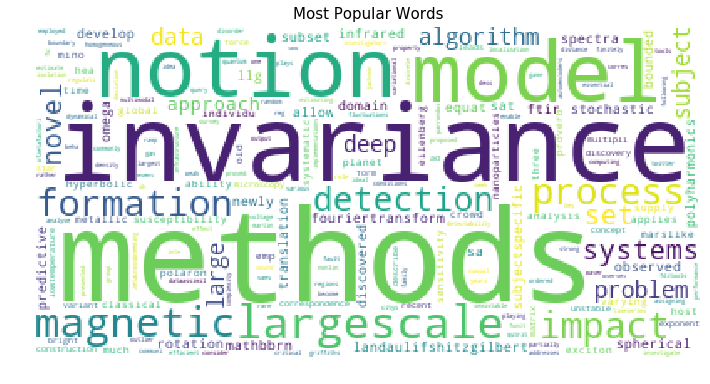

In [107]:
wordcloud = WordCloud(background_color = 'white').generate(str(train['ABSTRACT']))
plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Words', fontsize = 15)
plt.axis('off')
plt.show();
# https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

# Exploratory Data Analysis

In [108]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(train['ABSTRACT'].transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = train.index

AttributeError: 'Series' object has no attribute 'transcript'

### Remove Stopwords

In [31]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords]
    return words

In [32]:
train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_stopwords)
test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_stopwords)

TypeError: argument of type 'LazyCorpusLoader' is not iterable

### Remove punctuation/lower casing

In [13]:
# regular expression library
import re

In [27]:


train.head(2)
test.head(2)

ID                                        TITLE  \
0   1  Reconstructing Subject-Specific Effect Maps   
1   2           Rotation Invariance Neural Network   

                                            ABSTRACT  
0    predictive models allow subjectspecific infe...  
1    rotation invariance and translation invarian...

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   

                                            ABSTRACT  
0    we present novel understandings of the gamma...  
1    meteorites contain minerals from solar syste...

In [19]:
train.head(10)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   
5   6  On maximizing the fundamental frequency of the...   
6   7  On the rotation period and shape of the hyperb...   
7   8  Adverse effects of polymer coating on heat tra...   
8   9  SPH calculations of Mars-scale collisions: the...   
9  10  $\mathcal{R}_{0}$ fails to predict the outbrea...   

                                            ABSTRACT  
0    predictive models allow subject-specific inf...  
1    rotation invariance and translation invarian...  
2    we introduce and develop the notion of spher...  
3    the stochastic landau--lifshitz--gilbert (ll...  
4    fourier-transform infra-red (ftir) spectra o...  
5    let $\omega \subset \mathbb{r}^n$ be a bound...  
6    we observed the newly discovered hyperbolic ...  
7    the ability of metallic nanoparticles to sup...  
8    we model large-scale ($\approx$2000km) impac...  
9    time varying susceptibility of host at indiv...

### Neeraj's Code

### Preprocessing the data

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anchhabra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anchhabra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)
test.head(3)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...  
2    Frame aggregation is a mechanism by which mu...

In [6]:
# Some preprocesssing that will be common to all the text classification methods you will see. 

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [7]:
train['ABSTRACT'] =  train['ABSTRACT'].apply(clean_text)
test['ABSTRACT'] = test['ABSTRACT'].apply(clean_text)

In [9]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [10]:
train['ABSTRACT'] =  train['ABSTRACT'].apply(clean_numbers)
test['ABSTRACT'] = test['ABSTRACT'].apply(clean_numbers)

In [12]:
# # This comes from CPMP script in the Quora questions similarity challenge. 
# import re
# from collections import Counter
# import gensim
# import heapq
# from operator import itemgetter
# from multiprocessing import Pool

# model = gensim.models.KeyedVectors.load_word2vec_format('../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin', 
#                                                         binary=True)
# words = model.index2word

# w_rank = {}
# for i,word in enumerate(words):
#     w_rank[word] = i

# WORDS = w_rank

# def words(text): return re.findall(r'\w+', text.lower())

# def P(word): 
#     "Probability of `word`."
#     # use inverse of rank as proxy
#     # returns 0 if the word isn't in the dictionary
#     return - WORDS.get(word, 0)

# def correction(word): 
#     "Most probable spelling correction for word."
#     return max(candidates(word), key=P)

# def candidates(word): 
#     "Generate possible spelling corrections for word."
#     return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# def known(words): 
#     "The subset of `words` that appear in the dictionary of WORDS."
#     return set(w for w in words if w in WORDS)

# def edits1(word):
#     "All edits that are one edit away from `word`."
#     letters    = 'abcdefghijklmnopqrstuvwxyz'
#     splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
#     deletes    = [L + R[1:]               for L, R in splits if R]
#     transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
#     replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
#     inserts    = [L + c + R               for L, R in splits for c in letters]
#     return set(deletes + transposes + replaces + inserts)

# def edits2(word): 
#     "All edits that are two edits away from `word`."
#     return (e2 for e1 in edits1(word) for e2 in edits1(e1))

# def build_vocab(texts):
#     sentences = texts.apply(lambda x: x.split()).values
#     vocab = {}
#     for sentence in sentences:
#         for word in sentence:
#             try:
#                 vocab[word] += 1
#             except KeyError:
#                 vocab[word] = 1
#     return vocab

# vocab = build_vocab(train.question_text)

# top_90k_words = dict(heapq.nlargest(90000, vocab.items(), key=itemgetter(1)))

# pool = Pool(4)
# corrected_words = pool.map(correction,list(top_90k_words.keys()))

# for word,corrected_word in zip(top_90k_words,corrected_words):
#     if word!=corrected_word:
#         print(word,":",corrected_word)

In [13]:
train.head(2)

ID                                        TITLE  \
0   1  Reconstructing Subject-Specific Effect Maps   
1   2           Rotation Invariance Neural Network   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject - specific i...                 1   
1    Rotation invariance and translation invarian...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   

   Quantitative Finance  
0                     0  
1                     0

In [14]:
test.head(2)

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...

### Stop Words

In [15]:
stop_words = set(stopwords.words('english'))
stop_words.update(['present','paper','study','based','introduce','learning','new','using','let',
                  "aren't","can't","'cause","could've","couldn't","didn't","doesn't","don't","hadn't",
                   "hasn't","haven't","he'd","he'll","he's","how'd","how'd'y","how'll","how's","I'd","I'd've",
                   "I'll","I'll've","I'm","I've","i'd","i'd've","i'll","i'll've","i'm","i've","isn't","it'd",
                   "it'd've","it'll","it'll've","it's","let's","ma'am","mayn't","might've","mightn't","mightn't've",
                   "must've","mustn't","mustn't've","needn't","needn't've","o'clock","oughtn't","oughtn't've",
                   "shan't","sha'n't","shan't've","she'd","she'd've","she'll","she'll've","she's","should've",
                   "shouldn't","shouldn't've","so've","so's","this's","that'd","that'd've","that's","there'd",
                   "there'd've","there's","here's","they'd","they'd've","they'll","they'll've","they're","they've",
                   "to've","wasn't","we'd","we'd've","we'll","we'll've","we're","we've","weren't","what'll",
                   "what'll've","what're","what's","what've","when's","when've","where'd","where's","where've",
                   "who'll","who'll've","who's","who've","why's","why've","will've","won't","won't've","would've",
                   "wouldn't","wouldn't've","y'all","y'all'd","y'all'd've","y'all're","y'all've","you'd","you'd've",
                   "you'll","you'll've","you're","you've","is not","are not","cannot","because","could have",
                   "could not","did not","does not","do not","had not","has not","have not","he would","he will",
                   "he is","how did","how do you","how will","how is","I would","I would have","I will","I will have",
                   "I am","I have","i would","i would have","i will","i will have","i am","i have","is not","it would",
                   "it would have","it will","it will have","it is","let us","madam","may not","might have","might not",
                   "might not have","must have","must not","must not have","need not","need not have","of the clock","ought not",
                   "ought not have","shall not","shall not","shall not have","she would","she would have","she will","she will have",
                   "she is","should have","should not","should not have","so have","so as","this is","that would","that would have",
                   "that is","there would","there would have","there is","here is","they would","they would have","they will",
                   "they will have","they are","they have","to have","was not","we would","we would have","we will","we will have",
                   "we are","we have","were not","what will","what will have","what are","what is","what have","when is","when have",
                   "where did","where is","where have","who will","who will have","who is","who have","why is","why have","will have",
                   "will not","will not have","would have","would not","would not have","you all","you all would","you all would have",
                   "you all are","you all have","you would","you would have","you will","you will have","you are"])

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

train['ABSTRACT'] = train['ABSTRACT'].apply(removeStopWords)
test['ABSTRACT'] = test['ABSTRACT'].apply(removeStopWords)

In [16]:
train['ABSTRACT'].head(5)
test['ABSTRACT'].head(5)

0      Predictive models allow subject - specific i...
1      Rotation invariance  translation invariance ...
2         develop  notion  spherical polyharmonics ...
3       stochastic Landau -  - Lifshitz -  - Gilber...
4      Fourier - transform infra - red  ( FTIR )  s...
Name: ABSTRACT, dtype: object

0        novel understandings   Gamma - Poisson  ( ...
1      Meteorites contain minerals  Solar System as...
2      Frame aggregation   mechanism   multiple fra...
3      Milky Way open clusters   diverse  terms  ag...
4      Proving   cryptographic protocol  correct  s...
Name: ABSTRACT, dtype: object

### Stemming

In [19]:
start_time = time.time() 

stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

train['ABSTRACT'] = train['ABSTRACT'].apply(stemming)
test['ABSTRACT'] = test['ABSTRACT'].apply(stemming)

train['ABSTRACT'].head(5)
test['ABSTRACT'].head(5)

print("--- %s seconds ---" % (time.time() - start_time))

0    predict model allow subject - specif infer ana...
1    rotat invari translat invari great valu imag r...
2    develop notion spheric polyharmon , natur gene...
3    stochast landau - - lifshitz - - gilbert ( llg...
4    fourier - transform infra - red ( ftir ) spect...
Name: ABSTRACT, dtype: object

0    novel understand gamma - poisson ( gap ) model...
1    meteorit contain miner solar system asteroid d...
2    frame aggreg mechan multipl frame combin singl...
3    milki way open cluster divers term age , chemi...
4    prove cryptograph protocol correct secreci har...
Name: ABSTRACT, dtype: object

--- 56.48369002342224 seconds ---


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [21]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [24]:
train['ABSTRACT'] =  train['ABSTRACT'].str.lower()
test['ABSTRACT'] =  test['ABSTRACT'].str.lower()

train['ABSTRACT'] =  train['ABSTRACT'].apply(cleanPunc)
test['ABSTRACT'] =  test['ABSTRACT'].apply(cleanPunc)

train['ABSTRACT'] =  train['ABSTRACT'].apply(keepAlpha)
test['ABSTRACT'] =  test['ABSTRACT'].apply(keepAlpha)

In [23]:
train['ABSTRACT'].head(5)
test['ABSTRACT'].head(5)

0    predict model allow subject   specif infer ana...
1    rotat invari translat invari great valu imag r...
2    develop notion spheric polyharmon natur genera...
3    stochast landau     lifshitz     gilbert llg e...
4    fourier   transform infra   red ftir spectra s...
Name: ABSTRACT, dtype: object

0    novel understand gamma   poisson gap model pro...
1    meteorit contain miner solar system asteroid d...
2    frame aggreg mechan multipl frame combin singl...
3    milki way open cluster divers term age chemic ...
4    prove cryptograph protocol correct secreci har...
Name: ABSTRACT, dtype: object

In [51]:
# Basic Punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [29]:
# Additional Punctuation - Part 1
def remove_punctuation_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [30]:
# Additional Punctuation - Part 2
def remove_punctuation_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [31]:
# Apply a second round of cleaning
def remove_punctuation_2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [34]:
start_time = time.time()
# train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation)
# test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation)
# train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation_1)
# test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation_1)
train['ABSTRACT'] =  train['ABSTRACT'].apply(remove_punctuation_2)
test['ABSTRACT'] =  test['ABSTRACT'].apply(remove_punctuation_2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.22032618522644043 seconds ---


In [21]:
train['ABSTRACT'] =  train['ABSTRACT'].str.lower()
test['ABSTRACT'] =  test['ABSTRACT'].str.lower()

train['ABSTRACT'] =  train['ABSTRACT'].apply(cleanPunc)
test['ABSTRACT'] =  test['ABSTRACT'].apply(cleanPunc)

train['ABSTRACT'] =  train['ABSTRACT'].apply(keepAlpha)
test['ABSTRACT'] =  test['ABSTRACT'].apply(keepAlpha)

train.head()
test.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance and translation invariance...                 1   
2  we introduce and develop the notion of spheric...                 0   
3  the stochastic landau lifshitz gilbert llg equ...                 0   
4  fourier transform infra red ftir spectra of sa...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0  we present novel understandings of the gamma p...  
1  meteorites contain minerals from solar system ...  
2  frame aggregation is a mechanism by which mult...  
3  milky way open clusters are very diverse in te...  
4  proving that a cryptographic protocol is corre...

In [26]:
# def load_glove_index():
#     EMBEDDING_FILE = '../input/embeddings/glove.840B.300d/glove.840B.300d.txt'
#     def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
#     embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
#     return embeddings_index

# glove_embedding_index = load_glove_index()

Text(0.5, 1.0, 'Article')

Text(0, 0.5, 'Article Belongs To')

Text(0.5, 0, 'Number of articles')

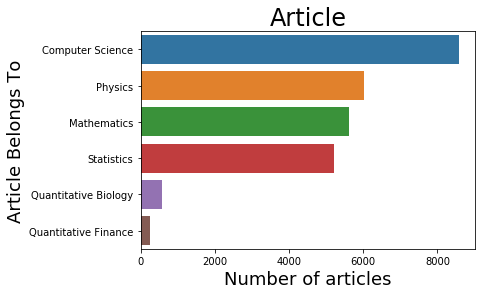

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
binary_labels=train[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]
categories = list(binary_labels.columns.values)
ax= sns.barplot(binary_labels.sum().values, categories)

plt.title("Article", fontsize=24)
plt.ylabel('Article Belongs To', fontsize=18)
plt.xlabel('Number of articles', fontsize=18)
#adding the text labels
rects = ax.patches
labels = binary_labels.sum().values
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# split dataset into training and validation set

tfidf_vectorizer = TfidfVectorizer(max_df=0.7999999999999999,max_features=25000, min_df=0.0, ngram_range=(1, 2))
xtrain, xval, ytrain, yval = train_test_split(train['ABSTRACT'], binary_labels, test_size=0.2, random_state=9)

# create TF-IDF features
# TF-IDF = Term frequency - inverse document frequency
# Used to predict how important a word is for a document
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [39]:
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)
xtrain_tfidf=pd.DataFrame(xtrain_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())
xtrain_tfidf.head()

aa  aaronson   ab  ab initio  abc  abel  abelian  abelian group  \
0  0.0       0.0  0.0        0.0  0.0   0.0      0.0            0.0   
1  0.0       0.0  0.0        0.0  0.0   0.0      0.0            0.0   
2  0.0       0.0  0.0        0.0  0.0   0.0      0.0            0.0   
3  0.0       0.0  0.0        0.0  0.0   0.0      0.0            0.0   
4  0.0       0.0  0.0        0.0  0.0   0.0      0.0            0.0   

   abelian subgroup  abelian varieti  aberr  abil  abil captur  abil learn  \
0               0.0              0.0    0.0   0.0          0.0         0.0   
1               0.0              0.0    0.0   0.0          0.0         0.0   
2               0.0              0.0    0.0   0.0          0.0         0.0   
3               0.0              0.0    0.0   0.0          0.0         0.0   
4               0.0              0.0    0.0   0.0          0.0         0.0   

   abil model  abl  abl accur  abl achiev  abl captur  abl detect  abl find  \
0         0.0  0.0        0.0         0.0         0.0         0.0       0.0   
1         0.0  0.0        0.0         0.0         0.0         0.0       0.0   
2         0.0  0.0        0.0         0.0         0.0         0.0       0.0   
3         0.0  0.0        0.0         0.0         0.0         0.0       0.0   
4         0.0  0.0        0.0         0.0         0.0         0.0       0.0   

   abl generat  abl identifi  abl improv  abl learn  abl obtain  \
0          0.0           0.0         0.0        0.0         0.0   
1          0.0           0.0         0.0        0.0         0.0   
2          0.0           0.0         0.0        0.0         0.0   
3          0.0           0.0         0.0        0.0         0.0   
4          0.0           0.0         0.0        0.0         0.0   

   abl outperform  abl perform  abl predict  abl produc  abl provid  \
0             0.0          0.0          0.0         0.0         0.0   
1             0.0          0.0          0.0         0.0         0.0   
2             0.0          0.0          0.0         0.0         0.0   
3             0.0          0.0          0.0         0.0         0.0   
4             0.0          0.0          0.0         0.0         0.0   

   abl recov  abl reproduc  abl show  ablat  ablowitz  abnorm  abridg  abrupt  \
0        0.0           0.0       0.0    0.0       0.0     0.0     0.0     0.0   
1        0.0           0.0       0.0    0.0       0.0     0.0     0.0     0.0   
2        0.0           0.0       0.0    0.0       0.0     0.0     0.0     0.0   
3        0.0           0.0       0.0    0.0       0.0     0.0     0.0     0.0   
4        0.0           0.0       0.0    0.0       0.0     0.0     0.0     0.0   

   abrupt chang    absenc  absent  absolut  absolut continu  absolut error  \
0           0.0  0.000000     0.0      0.0              0.0            0.0   
1           0.0  0.000000     0.0      0.0              0.0            0.0   
2           0.0  0.000000     0.0      0.0              0.0            0.0   
3           0.0  0.068562     0.0      0.0              0.0            0.0   
4           0.0  0.000000     0.0      0.0              0.0            0.0   

   absolut valu  absorb  absorb boundari  absorpt  absorpt emiss  \
0           0.0     0.0              0.0      0.0            0.0   
1           0.0     0.0              0.0      0.0            0.0   
2           0.0     0.0              0.0      0.0            0.0   
3           0.0     0.0              0.0      0.0            0.0   
4           0.0     0.0              0.0      0.0            0.0   

   absorpt featur  absorpt line  absorpt spectra  absorpt spectroscopi  \
0             0.0           0.0              0.0                   0.0   
1             0.0           0.0              0.0                   0.0   
2             0.0           0.0              0.0                   0.0   
3             0.0           0.0              0.0                   0.0   
4             0.0           0.0              0.0                   0

In [65]:
# xtrain_tfidf.shape
ytrain.shape

(16777, 6)

In [62]:
#Run Logistic Regrssion
logreg = LogisticRegression(class_weight='balanced',n_jobs=-1,random_state=9)
logreg_classifier = OneVsRestClassifier(logreg)

In [ ]:
# fit model on train data
logreg_classifier.fit(xtrain_tfidf, ytrain)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

#Run Logistic Regrssion
logreg = LogisticRegression(class_weight='balanced',n_jobs=-1,random_state=9)
logreg_classifier = OneVsRestClassifier(logreg)

# fit model on train data
logreg_classifier.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
ytrain_pred=logreg_classifier.predict(xtrain_tfidf)
yval_pred = logreg_classifier.predict(xval_tfidf)

# # evaluate performance
# from sklearn.metrics import accuracy_score
# print()
# print("Accuracy score for Logistic Regression train: ",accuracy_score(ytrain, ytrain_pred))
# print("Accuracy score for Logistic Regression validation:",accuracy_score(yval, yval_pred))

# print('\n')

# print('f1-Score Train: ',f1_score(y_true=ytrain, y_pred=ytrain_pred, average='micro'))
# print('f1-Score validation: ',f1_score(y_true=yval, y_pred=yval_pred, average='micro'))

# print('\n')

# print("Classification report:")
# print(classification_report(yval, yval_pred, target_names=binary_labels.columns))

MemoryError: 